# Scientific Exploration of BGMI Game Data

# Table of Contents

1. Problem Statement
2. Objective
3. Installing & Importing Libraries
4. Data Acquisition & Description
5. Data Cleaning
6. Exploratory Data Analysis
7. Conclusion

#1.  Problem Statement

The objective is to analyze and gain insights from a dataset containing anonymized BGMI game stats. Each row in the dataset represents the post-game statistics of a player. The goal is to understand various factors that contribute to a player's performance and their chances of winning in the game.

# 2. Objective

The main objective is to explore the dataset and draw meaningful conclusions regarding player performance and winning outcomes in BGMI. The analysis will focus on various aspects such as kills, kill streaks, team kills, distances traveled, healing and boosting items usage, match duration, and their correlations with the target variable winPlacePerc.

# 3. Installing & Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Data Acquisition & Description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/GitHub_Project/BGMI_EDA/data.csv'
data = pd.read_csv(path)

In [ ]:
pd.set_option('display.expand_frame_repr', False)

In [ ]:
print(data.shape)
print(data.head())

(1111742, 30)
   Unnamed: 0              Id         groupId         matchId  assists  boosts  damageDealt  DBNOs  headshotKills  heals  ...  revives  rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys walkDistance  weaponsAcquired  winPoints  winPlacePerc
0     2093518  a3e3cea9f2e314  c9f6eaa81245b5  a3d8693390584c        0       0        25.93      0              0      0  ...        0           0.0          0           0.0          0                0       151.30                1       1525        0.0667
1     3701672  43e4be7ad72cc7  521836de101ee8  b65de9055327e0        0       0        36.71      0              0      0  ...        0           0.0          0           0.0          0                0      1918.00                7       1516        0.5862
2     2059784  9a68690e31fdff  4a72ffa2cebd90  d6aad3f9830e60        0       1        47.73      0              0      0  ...        0        4088.0          0           0.0          0                0       820.00 

# 4.1 Data Information

In this section, we will get information about the data and see some observations.

###Data fields

###### DBNOs- Number of enemy players knocked.
######assists- Number of enemy players this player damaged that were killed by teammates.
######boosts - Number of boost items used.
######damageDealt- Total damage dealt. Note: Self inflicted damage is subtracted.
######headshotKills- Number of enemy players killed with headshots.
######heals- Number of healing items used.
######Id- Player’s Id
######killPlace- Ranking in match of number of enemy players killed.
######killPoints- Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
######killStreaks- Max number of enemy players killed in a short amount of time.
######kills - Number of enemy players killed.
######longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
######matchDuration - Duration of match in seconds.
######matchId - ID to identify matches. There are no matches that are in both the training and testing set.
######matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
######rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
######revives - Number of times this player revived teammates.
######rideDistance - Total distance traveled in vehicles measured in meters.
######roadKills - Number of kills while in a vehicle.
######swimDistance - Total distance traveled by swimming measured in meters.
######teamKills - Number of times this player killed a teammate.
######vehicleDestroys - Number of vehicles destroyed.
######walkDistance - Total distance traveled on foot measured in meters.
######weaponsAcquired - Number of weapons picked up.
######winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
######groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
######numGroups - Number of groups we have data for in the match.
######maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
######winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the - - match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [ ]:
data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [ ]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

### Observation
The column 'winPlacePerc' has 1 missing value that needs to be addressed, and unnecessary columns should be dropped. The data types of all the columns appear to be appropriate.

# 4.2 Data Description
In this section we will get description and statistics about the data.

In [ ]:
data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [ ]:
data['kills'].quantile(0.99)

7.0

In [ ]:
data['killStreaks'].quantile(0.99)

3.0

In [ ]:
data['teamKills'].quantile(0.99)

1.0

In [ ]:
df = data.copy()
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
print(df['totalDistance'].mean())
print(df['totalDistance'].quantile(0.25))
print(df['totalDistance'].quantile(0.50))
print(df['totalDistance'].quantile(0.75))
print(df['totalDistance'].quantile(0.99))
print(df['totalDistance'].max())

1762.041361110761
158.3
785.4
2724.0
9302.0
37312.0


In [ ]:
data['heals'].quantile(0.99)

12.0

In [ ]:
data['boosts'].quantile(0.99)

7.0

### Observations
####Kills-
1. The average person kills 0.9255 players
2. 50% of people have  more than 0.0  kills
3. 25% of people have more than 1.0  kills
4. 1% of people have more than 7.0  kills
5. while the most kills recorded in the data is 72

####killStreaks-
1. The average person kills 0.5449 players in a short time
2. 50% of people have  more than 0.0  kills in a short time
3. 25% of people have  more than 1.0  kills in a short time
4. 1% of people have more than 3.0  kills in a short time
5. While the most kills in a row recorded in the data is 20

####teamKills
1. The average person kills 0.0240 players on their own team
2. 50% of people have killed more than 0.0  team players
3. 25% of people have killed more than 0.0  team players
4. 1% of people have killed more than 1.0  team players
5. while the most kills recorded in the data is 10

####totalDistance
1. The average person travelled 1762.04 m
2. 75% of people have travelled more than 158.30 m
3. 50% of people have travelled more than 785.40 m
4. 25% of people have travelled more than 2724.00 m
5. 1% of people have travelled more than 9302.00 m
6. The longest distance travelled in the data is 37312.00 m

####heals
1. The average person uses 1.37 healing items
2. 50% of people used more than 0.00 healing items
3. 25% of people used more than 2.00 healing items
4. 1% of people used more than 12.00 healing items

####boosts
1. The average person uses 1.11 boosting items
2. 50% of people used more than 0.00 boosting items
3. 25% of people used more than 2.00 boosting items or less
4. 1% of people used more than 7.00 boosting items or less

# 5. Data Cleaning

####5.1 Removing unnecessary columns/ features

In [ ]:
data.drop(columns=['Unnamed: 0'],inplace=True)

####5.2 Handling null values

In [ ]:
data.dropna(subset=['winPlacePerc'], inplace=True)

In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

####5.3 Handling duplicates

In [ ]:
data.duplicated().sum()

0

### The data has been cleaned. Now, we can proceed with the analysis through visualization.

# 6. Exploratory Data Analysis

## Univariate Analysis

###6.1 Distribution and proportion of kills across players

Text(0.5, 1.0, 'Proportion of kills across players')

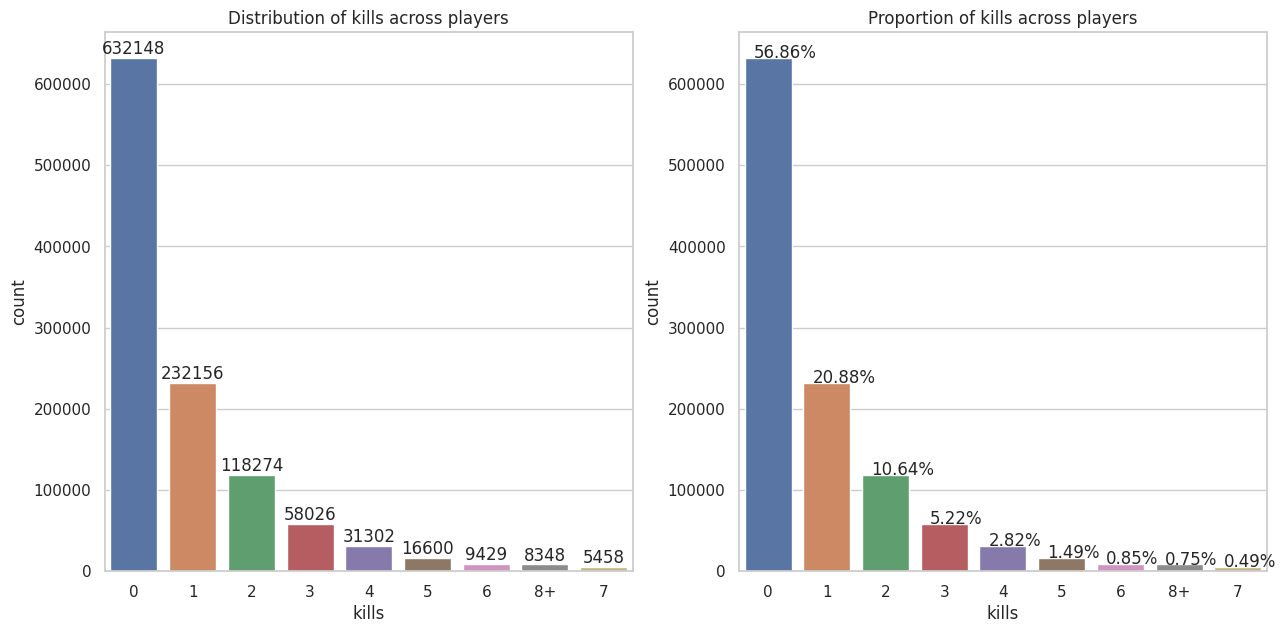

In [ ]:
df = data.copy()
df.loc[data['kills'] > df['kills'].quantile(0.99)] = '8+'
figure = plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
a = df['kills'].value_counts()
b = a.index.tolist()
y = sns.countplot(data=df, x='kills',order=b)
for bars in y.containers:
    y.bar_label(bars)
plt.title(label='Distribution of kills across players')
plt.subplot(1,2,2)
ax = sns.countplot(data=df, x='kills',order=b)
for p in ax.patches:
    total = df.shape[0]
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
plt.title(label='Proportion of kills across players')

####Observation
######56.86% (632,148 players) have taken 0 kills.
0.75% (5,458 players) have taken 8+ kills.

### 6.2 Distribution and proportion of killStreaks across players

Text(0.5, 1.0, 'Proportion of killStreaks across players')

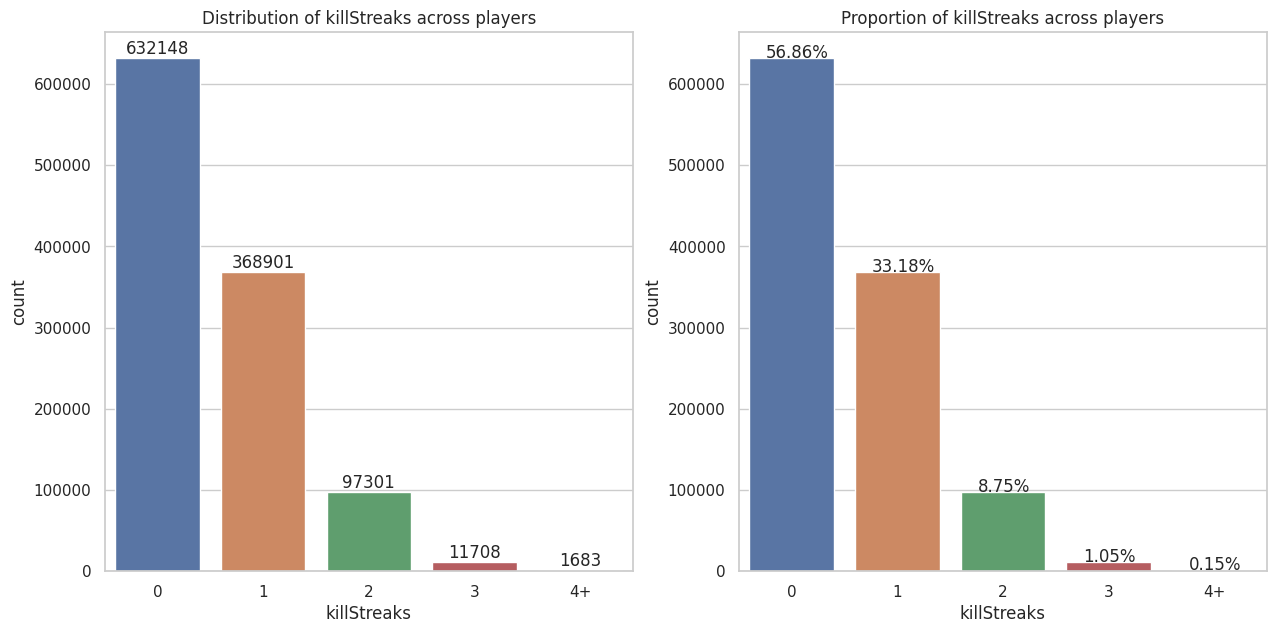

In [ ]:
df = data.copy()
df.loc[data['killStreaks'] > df['killStreaks'].quantile(0.99)] = '4+'
figure = plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
a = df['killStreaks'].value_counts()
b = a.index.tolist()
y = sns.countplot(data=df, x='killStreaks',order=b)
for bars in y.containers:
    y.bar_label(bars)
plt.title(label='Distribution of killStreaks across players')
plt.subplot(1,2,2)
ax = sns.countplot(data=df, x='killStreaks',order=b)
for p in ax.patches:
    total = df.shape[0]
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y))
plt.title(label='Proportion of killStreaks across players')

####Observation
######A maximum of 56.86% (632,148 players) have a killStreak of 0.
Only 0.15% (1,683 players) have a killStreak of 4 or more.

### 6.3 Distribution of matchtype across players

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'squad-fpp'),
  Text(1, 0, 'duo-fpp'),
  Text(2, 0, 'squad'),
  Text(3, 0, 'solo-fpp'),
  Text(4, 0, 'duo'),
  Text(5, 0, 'solo'),
  Text(6, 0, 'normal-squad-fpp'),
  Text(7, 0, 'crashfpp'),
  Text(8, 0, 'normal-duo-fpp'),
  Text(9, 0, 'flaretpp'),
  Text(10, 0, 'normal-solo-fpp'),
  Text(11, 0, 'flarefpp'),
  Text(12, 0, 'normal-squad'),
  Text(13, 0, 'crashtpp'),
  Text(14, 0, 'normal-solo'),
  Text(15, 0, 'normal-duo')])

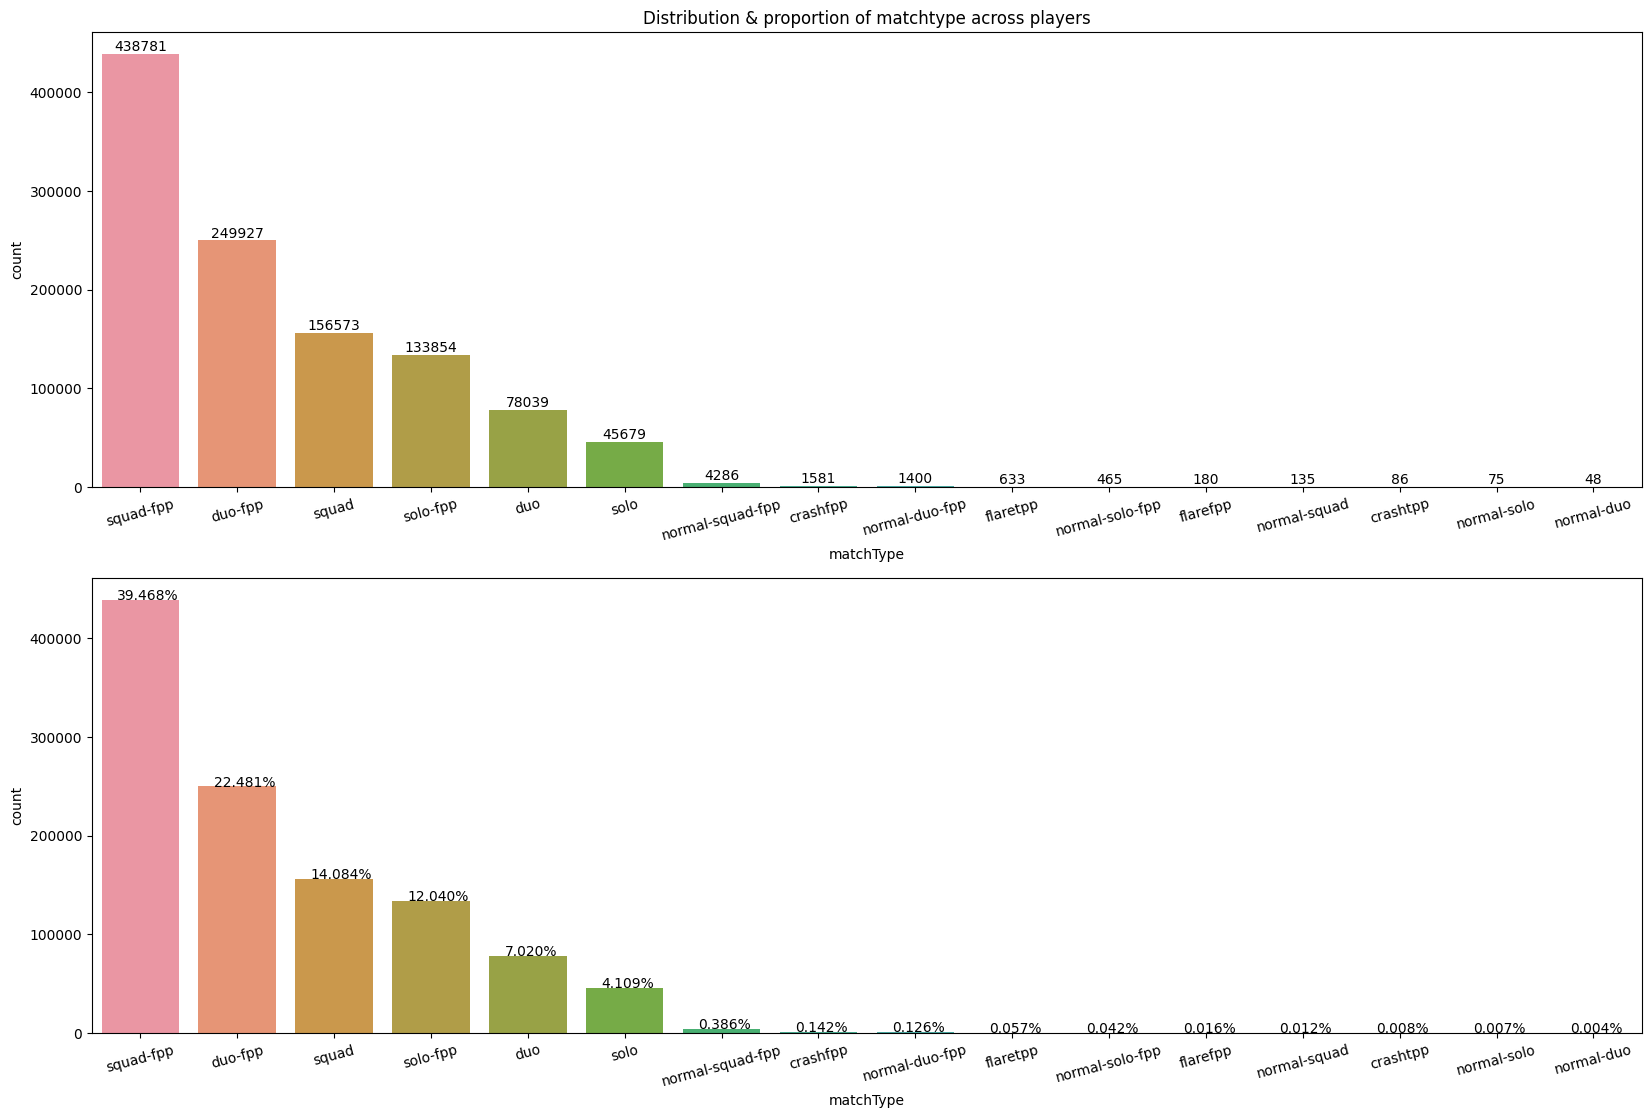

In [ ]:
figure = plt.figure(figsize=[20,13])
plt.subplot(2,1,1)
a = data['matchType'].value_counts()
b = a.index.tolist()
y = sns.countplot(data=data, x='matchType',order=b)
for bars in y.containers:
    y.bar_label(bars)
plt.xticks(rotation=15)
plt.title(label='Distribution & proportion of matchtype across players')
plt.subplot(2,1,2)
ax = sns.countplot(data=data, x='matchType',order=b)
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.3f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width() / 5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y))
plt.xticks(rotation=15)

####Observation
######Maximum: 39.47% (438,781) playing squad-fpp.
Minimum: 0.004% (48) playing normal-duo.

###6.4 Distribution of damageDealt across players

Text(0.5, 1.0, 'Distribution of damageDealt across players')

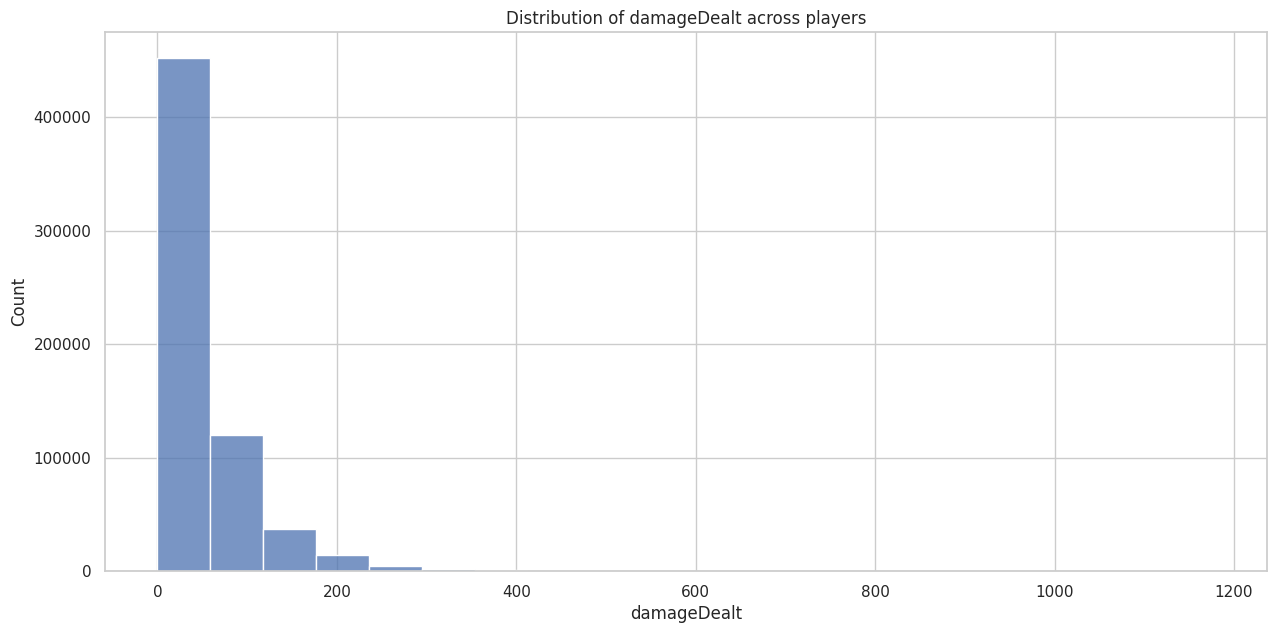

In [ ]:
df = data.copy()
df = df[df['kills']==0]
figure = plt.figure(figsize=[15,7])
sns.histplot(data=df,x='damageDealt',bins=20)
plt.title(label='Distribution of damageDealt across players')

#### Observation
Here, we observe a distribution of damage inflicted by players who haven't achieved any kills. The majority of players appear to have relatively low damage, which could be attributed to new players who are familiarizing themselves with the game mechanics. These players might be facing challenges from more experienced opponents, resulting in lower damage outputs.

### 6.5 Distribution of matchDuration across all winners.

<ipython-input-112-5c7d4e78594f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['matchDuration'])


Text(0.5, 1.0, 'Distribution of matchDuration across all winners')

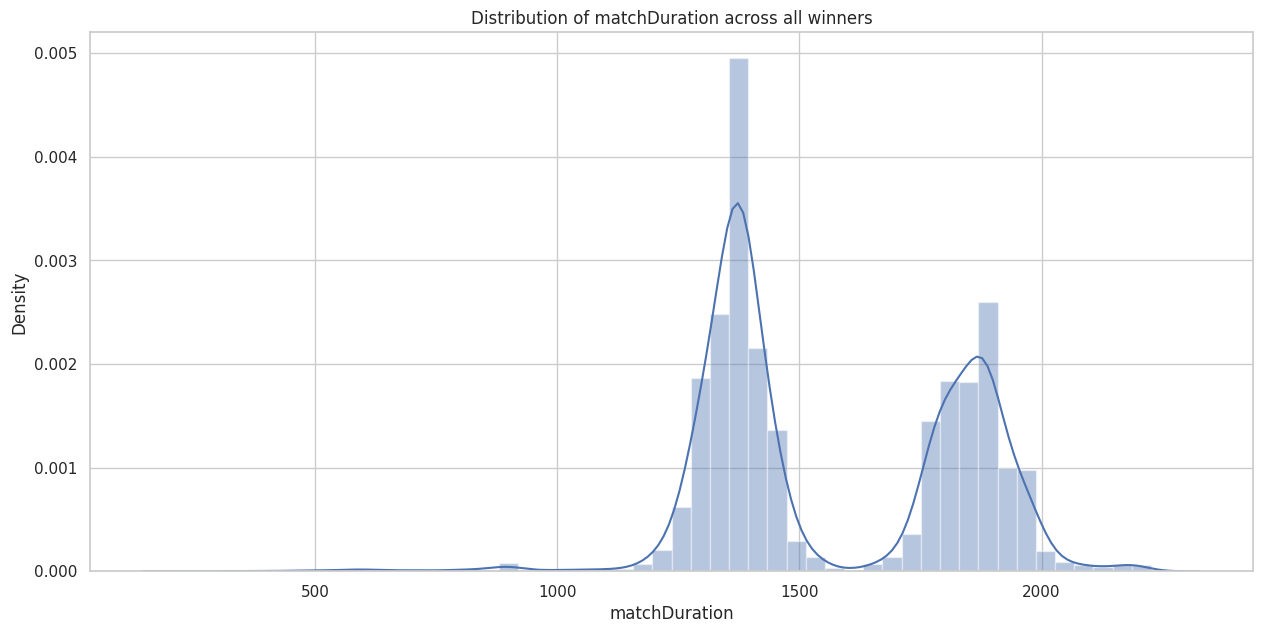

In [ ]:
df = data.copy()
df = data[data['winPlacePerc'] == 1]
figure = plt.figure(figsize=[15,7])
sns.distplot(df['matchDuration'])
plt.title('Distribution of matchDuration across all winners')

#### Observation
#####It appears that the match duration has no bearing on the winPlacePerc. Apparently you can even win the game in just over 2 min, but more commonly the game is won in approximately 1400 or 1850 seconds.
The match Duration is not a feature that is likely to be useful in predicting the winPlacePer.

## Bivariate Analysis

### 6.5 Correlation  between winPlacePerc and killStreaks.

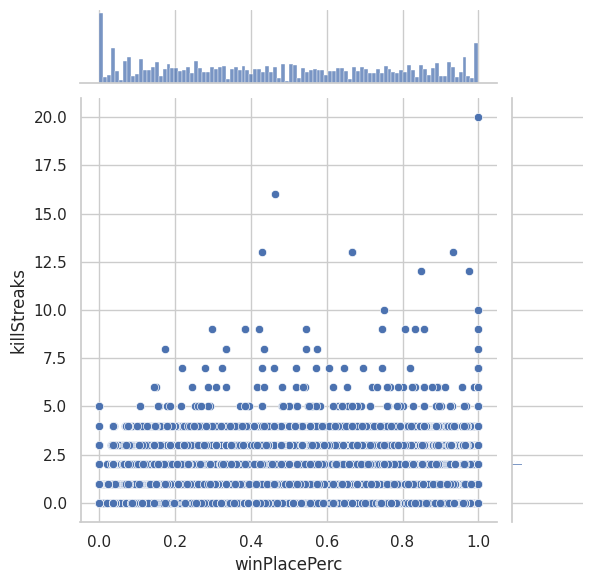

In [ ]:
sns.jointplot(data=data, x='winPlacePerc', y='killStreaks', color='b')

###6.6 Correlation between winPlacePerc and damageDealt.

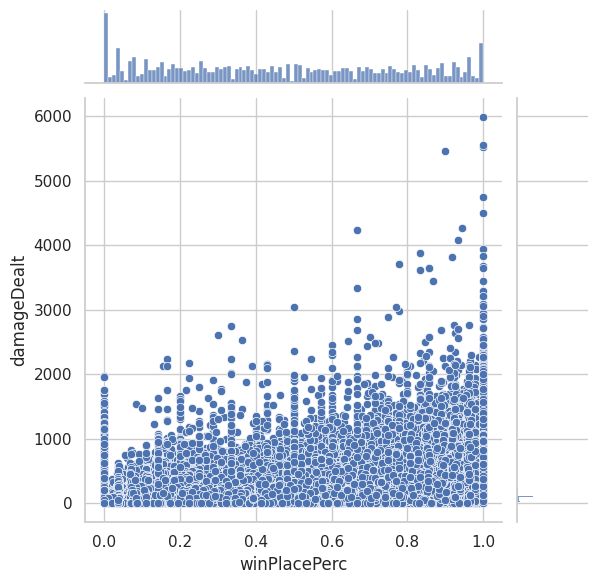

In [ ]:
sns.jointplot(data=data,x='winPlacePerc',y='damageDealt')

#### Observation
A noticeable correlation is evident between the damage inflicted on enemy players and the winPlacePerc.

### 6.7 Correlation between winPlacePerc and teamKills.

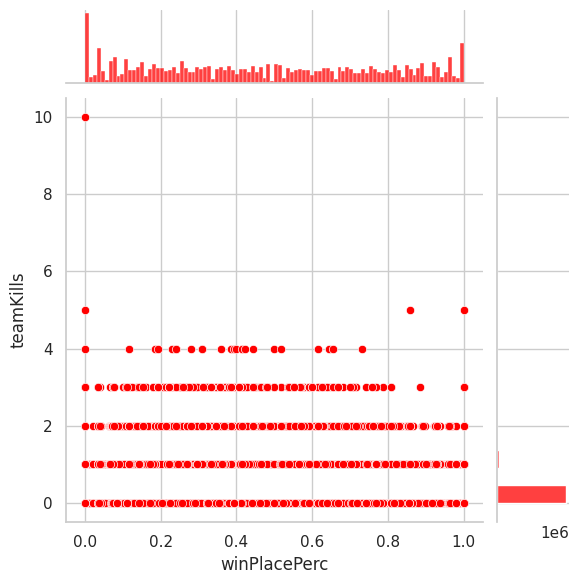

In [ ]:
sns.jointplot( data=data,x='winPlacePerc', y='teamKills', color='red')

###6.7 Correlation between winPlacePerc and totalDistance.

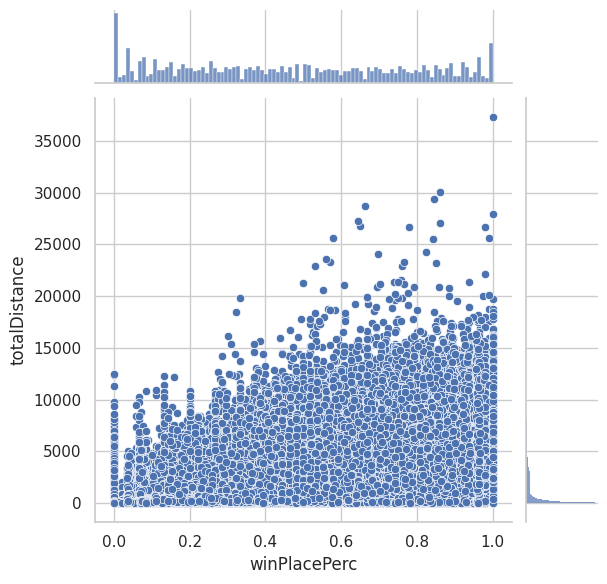

In [ ]:
df = data.copy()
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
sns.jointplot(data=df, x='winPlacePerc', y='totalDistance')

####Observation
A substantial correlation exists between the total distance traveled and achieving victory.

###6.8 Correlation between winPlacePerc and damageDealt.

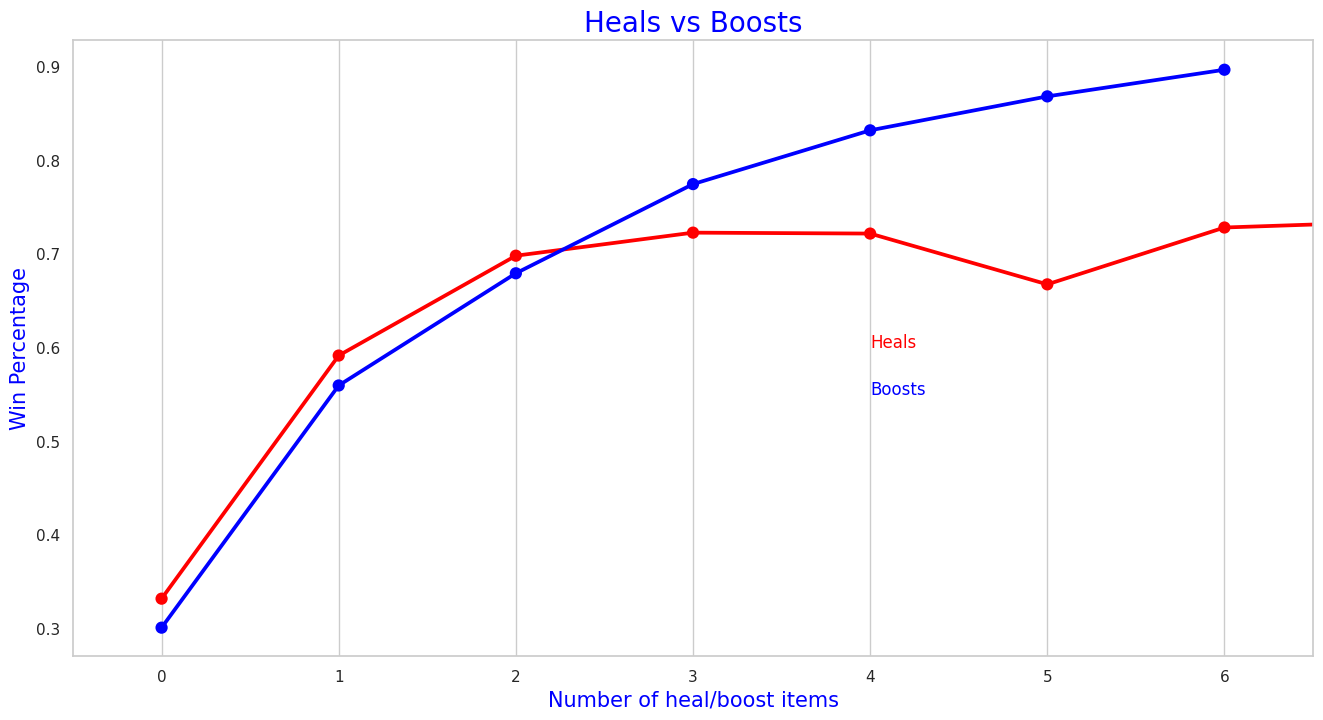

In [ ]:
df = data.copy()
df = df[df['heals'] < df['heals'].quantile(0.99)]
df = df[df['boosts'] < df['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(16,8))
sns.pointplot(x='heals',y='winPlacePerc',data=df,color='red')
sns.pointplot(x='boosts',y='winPlacePerc',data=df,color='blue')

plt.text(4,0.6,'Heals',color='red')
plt.text(4,0.55,'Boosts',color='blue')

plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()

#### Observation
#####Here we can see how the heal items and boost items ae used compared to each other.
Here, we observe the usage of healing items and boost items in comparison.
This observation suggests that employing a small number of healing items enhances the likelihood of winning, while utilizing more boosts is required to significantly improve your chances of winning.

## Multivariate Analysis

###6.9 Correlation between all the features

<ipython-input-118-f3caa54cffa6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True,linewidths=.5, fmt= '.2f')


<Axes: >

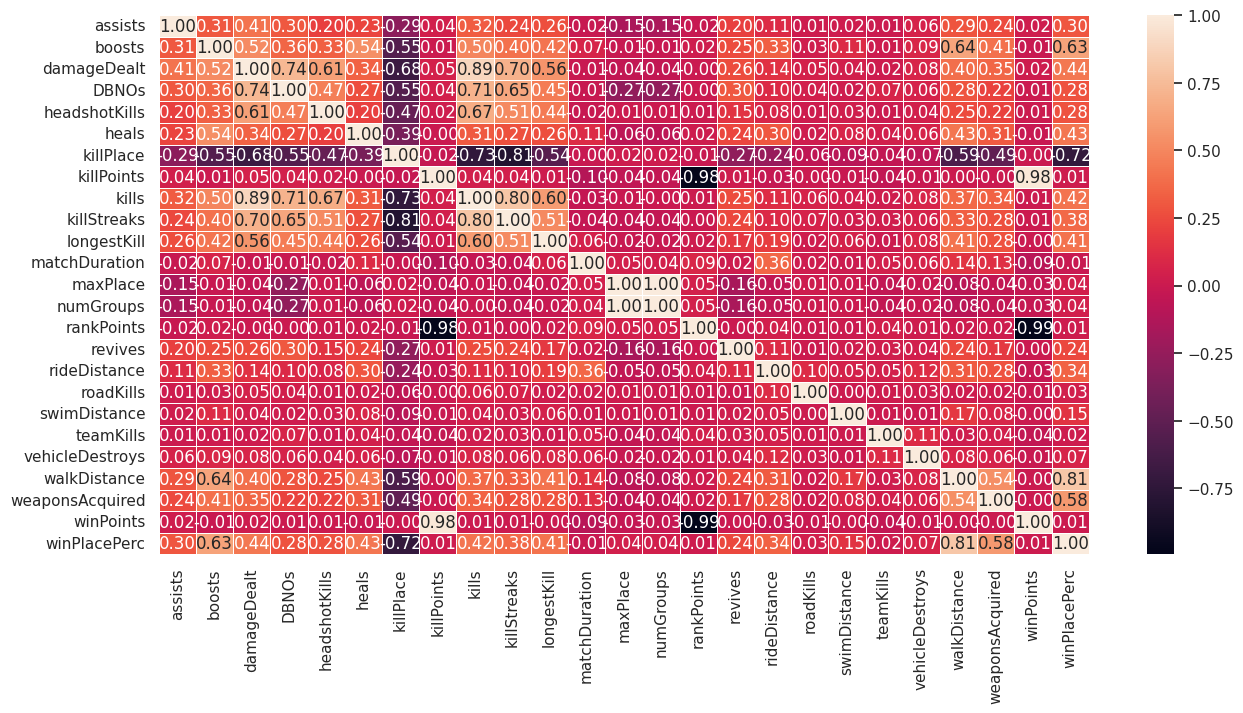

In [ ]:
figure= plt.figure(figsize=[15,7])
sns.heatmap(data=data.corr(), annot=True,linewidths=.5, fmt= '.2f')

####Observation
#####According to the colorbar we can find the correlation between different features.
If correlation is positive, one variable increases with other.
#####If correlation is negative, as one variable increases, the other decreases.
if correlation is 1, it means that either the variables are same or they are almost same

# Conclusion

1. Kills and Kill Streaks: The analysis revealed that while the average number of kills is relatively low (0.9255 players), there are instances of players achieving high kill counts (up to 72 kills). Additionally, players tend to have shorter kill streaks, with an average of 0.5449 kills in a short time.

2. Team Kills: On average, players rarely kill teammates (0.0240 players), indicating a sportsmanlike behavior among most players.

3. Total Distance Traveled: The average distance traveled is 1762.04 meters, with variations among players. Higher distances traveled are generally associated with better winPlacePerc, indicating the importance of movement and positioning in the game.

4. Healing and Boosting Items: Players use an average of 1.37 healing items and 1.11 boosting items. The analysis suggests that using a few healing items increases the chance of winning, but more boosting items are needed to significantly increase winning chances.

5. Match Duration: Match duration does not seem to strongly influence winPlacePerc, indicating that faster matches can have comparable outcomes to longer ones.

6. Correlations: There are reasonable correlations between damage dealt, total distance traveled, and winPlacePerc, suggesting that these factors play a role in a player's success.

7. Game Mode Analysis: A breakdown of game modes showed that the most popular mode is "squad-fpp" (39.47% of players), while the least popular is "normal-duo" (0.004% of players).

Overall, the analysis provides insights into various gameplay elements that influence a player's performance and winning chances in BGMI. These findings can be valuable for players looking to improve their strategies and for game developers aiming to enhance player experiences.